<div style="direction:rtl"><h1 style="color:rgb(179, 0, 0)">
پروژه صفر: آشنایی با هوش مصنوعی
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="direction:rtl"><h1 style="color:rgb(134, 45, 89)">    
قسمت اول: بارگیری و کاوش داده ها

</div>

<h3 style="color:rgb(115, 0, 230)"> Part I.I

In [2]:
df = pd.read_csv("AdmissionPredict.csv")

In [3]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1      337.0        118.0                  4  4.5   4.5  9.65   
1           2      324.0        107.0                  4  4.0   4.5  8.87   
2           3      316.0          NaN                  3  3.0   3.5  8.00   
3           4        NaN        110.0                  3  3.5   2.5  8.67   
4           5      314.0        103.0                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1              NaN  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [4]:
df.tail()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
395         396      324.0        110.0                  3  3.5   3.5  9.04   
396         397      325.0        107.0                  3  3.0   3.5  9.11   
397         398      330.0        116.0                  4  5.0   4.5  9.45   
398         399      312.0        103.0                  3  3.5   4.0  8.78   
399         400      333.0        117.0                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
395         1             0.82  
396         1              NaN  
397         1             0.91  
398         0             0.67  
399         1             0.95

In [5]:
infoBeforeFillna = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            378 non-null float64
TOEFL Score          380 non-null float64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 380 non-null float64
Research             400 non-null int64
Chance of Admit      384 non-null float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


In [6]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  378.000000   380.000000         400.000000  400.000000   
mean   200.500000  316.759259   107.386842           3.087500    3.400000   
std    115.614301   11.415599     6.048645           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.250000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit  
count  400.000000  380.000000  400.000000       384.000000  
mean     3.452500    8.604737    0.547500         0.724375  
std      0.898478    0.599167    0.498362         0.142964  
min      1.000000    6.800000    0.000000         0.340000  
25%      3.000000    8.170000    0.000000         0.640000  
50%      3.500000    8.640000    1.000000         0.730000  
75%      4.000000    9.080000    1.000000         0.830000  
max      5.000000    9.920000    1.000000         0.970000

<h3 style="color:rgb(115, 0, 230)">Part I.II

<div style="direction:rtl">
تعداد داده های گمشده در هر ستون به دست می آوریم و پایین تر بعد از جایگزینی مقایسه میکنیم
</div>

In [7]:
df.isna().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

<h3 style="color:rgb(115, 0, 230)">Part I.III

<div style="direction:rtl">
ستون هدف یعنی شانس پذیرش را نگه میداریم و مقادیر گمشده ستون ها را با مقدار میانگین جایگزین می کنیم و ستون هدف را با مقدار قبلی جایگزین می کنیم تا داده های گمشده برای این ستون باقی بماند
</div>

In [8]:
coa = df['Chance of Admit']
df.drop('Chance of Admit', axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)
df['Research'].mean()
df['Chance of Admit'] = coa

<div style="direction:rtl">
همانطور که دیده می شود بجز ستون هدف بقیه ستون ها دیگر داده گمشده ندارند و تعداد داده های گمشده ستون هدف ۱۶ باقی مانده است
</div>

In [9]:
df.isna().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit      16
dtype: int64

<div style="direction:rtl">
همانطور که دیده می شود جنس داده های ستون ها قبل و بعد از پر کردن داده های گمشده تغییر نکرده است
</div>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null float64
TOEFL Score          400 non-null float64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      384 non-null float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


<div style="direction:rtl"><h1 style="color:rgb(134, 45, 89)">
قسمت دوم: همبستگی و ارتباط مشخصه ها با متغیر هدف
</div>

<h3 style="color:rgb(115, 0, 230)">Part II.I

<div style="direction:rtl">
اسم ستون ها رو به دست می آوریم و برای همه مشخصه ها نمودار رسم می کنیم
</div>

In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

Text(0, 0.5, 'Chance of Admit')

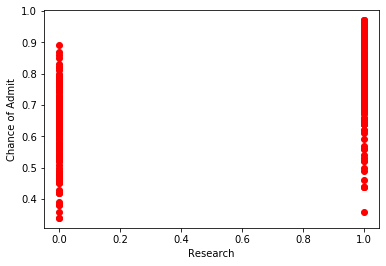

In [12]:
plt.plot(df['Research'], df['Chance of Admit'], 'o', color='red')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')

In [13]:
plt.plot(df['CGPA'], df['Chance of Admit'], 'o', color='blue')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

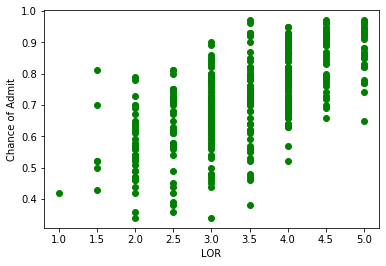

In [14]:
plt.plot(df['LOR '], df['Chance of Admit'], 'o', color='green')
plt.xlabel('LOR')
plt.ylabel('Chance of Admit')

In [15]:
plt.plot(df['SOP'], df['Chance of Admit'], 'o', color='purple')
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

In [16]:
plt.plot(df['University Rating'], df['Chance of Admit'], 'o', color='cadetblue')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

In [17]:
plt.plot(df['TOEFL Score'], df['Chance of Admit'], 'o', color='chocolate')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

In [18]:
plt.plot(df['GRE Score'], df['Chance of Admit'], 'o', color='palevioletred')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

In [19]:
plt.plot(df['Serial No.'], df['Chance of Admit'], 'o', color='gold')
plt.xlabel('Serial No.')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<h3 style="color:rgb(115, 0, 230)">Part II.II

<div style="direction:rtl">
<br>
<h4>
بیشترین همبستگی
</h4>
</br>
<br>
با روش
<h5>
Pearson Product-Moment Correlation
</h5>
</br>
با استفاده از تابع
numpy.corrcoef(x, y)
هبستگی داده ها با هدف را به دست می آوریم.
برای این کار ابتدا ستون هایی را که دارای مقادیر گمشده هستند حذف می کنیم
<br>
همانطور که دیده میشود ستون
CGPA
با همبستگی ۰.۸۳۸۸ بیشترین همبستگی را با ستون هدف یعنی شانس پذیرش دارد پس این مشخصه را برای بخش آخر انتخاب می کنیم
</br>
</div>

In [20]:
dfTrain = df.dropna()

In [21]:
np.corrcoef(dfTrain['Research'], dfTrain['Chance of Admit'])

array([[1.        , 0.54844314],
       [0.54844314, 1.        ]])

In [22]:
np.corrcoef(dfTrain['CGPA'], dfTrain['Chance of Admit'])

array([[1.        , 0.85567518],
       [0.85567518, 1.        ]])

In [23]:
np.corrcoef(dfTrain['LOR '], dfTrain['Chance of Admit'])

array([[1.        , 0.66345157],
       [0.66345157, 1.        ]])

In [24]:
np.corrcoef(dfTrain['SOP'], dfTrain['Chance of Admit'])

array([[1.        , 0.68075228],
       [0.68075228, 1.        ]])

In [25]:
np.corrcoef(dfTrain['University Rating'], dfTrain['Chance of Admit'])

array([[1.        , 0.70719058],
       [0.70719058, 1.        ]])

In [26]:
np.corrcoef(dfTrain['TOEFL Score'], dfTrain['Chance of Admit'])

array([[1.        , 0.75853449],
       [0.75853449, 1.        ]])

In [27]:
np.corrcoef(dfTrain['GRE Score'], dfTrain['Chance of Admit'])

array([[1.      , 0.785166],
       [0.785166, 1.      ]])

In [28]:
np.corrcoef(dfTrain['Serial No.'], dfTrain['Chance of Admit'])

array([[1.        , 0.04705715],
       [0.04705715, 1.        ]])

<div style="direction:rtl"><h1 style="color:rgb(134, 45, 89)">
قسمت سوم: کار با داده ها
</div>

<h3 style="color:rgb(115, 0, 230)">Part III.I

In [29]:
df[(df["CGPA"] >= 9) & (df["GRE Score"] >= 110)]

Serial No.   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1  337.000000        118.0                  4  4.5   4.5  9.65   
5             6  330.000000        115.0                  5  4.5   3.0  9.34   
11           12  316.759259        111.0                  4  4.0   4.5  9.00   
12           13  328.000000        112.0                  4  4.0   4.5  9.10   
22           23  328.000000        116.0                  5  5.0   5.0  9.50   
..          ...         ...          ...                ...  ...   ...   ...   
394         395  329.000000        111.0                  4  4.5   4.0  9.23   
395         396  324.000000        110.0                  3  3.5   3.5  9.04   
396         397  325.000000        107.0                  3  3.0   3.5  9.11   
397         398  330.000000        116.0                  4  5.0   4.5  9.45   
399         400  333.000000        117.0                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
0           1             0.92  
5           1             0.90  
11          1             0.84  
12          1             0.78  
22          1             0.94  
..        ...              ...  
394         1             0.89  
395         1             0.82  
396         1              NaN  
397         1             0.91  
399         1             0.95  

[115 rows x 9 columns]

count = 115

<h3 style="color:rgb(115, 0, 230)">Part III.II

In [30]:
df.groupby('University Rating')["GRE Score"].mean()

University Rating
1    303.153846
2    309.752856
3    315.934698
4    324.075075
5    327.954630
Name: GRE Score, dtype: float64

<div style="direction:rtl"><h1 style="color:rgb(134, 45, 89)">
قسمت چهارم: رگرسیون خطی تک متغیره
</div>

<h3 style="color:rgb(115, 0, 230)">Part IIII.I

<div style="direction:rtl">
یک دیتافریم جدید با ستون های 
CGPA و Chance of Admit
می سازیم و همه ستون های دارای داده گمشده را حذف می کنیم
این داده ها مجموعه داده های آموزش را می سازند
</div>

In [31]:
trainDF = df.filter(['CGPA','Chance of Admit'], axis=1).dropna()
trainDF

CGPA  Chance of Admit
0    9.65             0.92
2    8.00             0.72
3    8.67             0.80
4    8.21             0.65
5    9.34             0.90
..    ...              ...
394  9.23             0.89
395  9.04             0.82
397  9.45             0.91
398  8.78             0.67
399  9.66             0.95

[384 rows x 2 columns]

<h3 style="color:rgb(115, 0, 230)">Part IIII.II

<div style="direction:rtl">
<h5>
The Normal Equation
</h5>
</div>


<div style="direction:rtl">
برای یافتن مینیم تابع هزینه باید معادله زیر را برای مقادیر تتا حل کنیم
</div>
theta = (Xtranspose.X)inv.Xtranspose.Y

In [32]:
X = np.column_stack((np.ones((len(trainDF), 1)), trainDF['CGPA']))
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(trainDF['Chance of Admit'])
theta[0], theta[1]

(-1.080000383137357, 0.209662228794964)

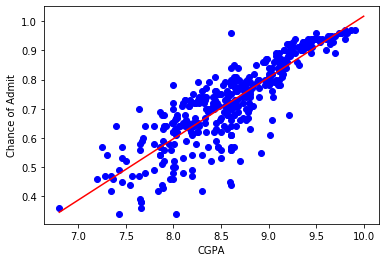

In [33]:
plt.plot(df['CGPA'], df['Chance of Admit'], 'o', color='blue')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

X = np.array([[np.min(df['CGPA'])], [10]])
XConcat = np.column_stack((np.ones((2, 1)), X))
y = XConcat.dot(theta)
plt.plot(X, y, linestyle='-', color='red')

<h3 style="color:rgb(115, 0, 230)">Part IIII.III

<div style="direction:rtl">
در این بخش داده هایی که مقدار 
NAN
در ستون هدف دارند را با مقدار پیش بینی شده جایگزین می کنیم
برای این کار اول این داده ها را جدا کرده و سپس با تخمینگر خطی که در بخش قبل محاسبه کردیم تخمین می زنیم
</div>

In [34]:
target = df.filter(['CGPA','Chance of Admit'], axis=1)[df['Chance of Admit'].isna()]
target

CGPA  Chance of Admit
1    8.87              NaN
57   7.60              NaN
135  8.77              NaN
143  9.92              NaN
171  9.07              NaN
218  8.97              NaN
232  8.27              NaN
251  9.00              NaN
272  7.64              NaN
294  8.32              NaN
315  8.07              NaN
338  8.74              NaN
357  7.89              NaN
381  8.67              NaN
390  8.24              NaN
396  9.11              NaN

In [35]:
target['Chance of Admit'] = target['CGPA'].apply(lambda x: theta[1]*x+theta[0])
target

CGPA  Chance of Admit
1    8.87         0.779704
57   7.60         0.513433
135  8.77         0.758737
143  9.92         0.999849
171  9.07         0.821636
218  8.97         0.800670
232  8.27         0.653906
251  9.00         0.806960
272  7.64         0.521819
294  8.32         0.664389
315  8.07         0.611974
338  8.74         0.752447
357  7.89         0.574235
381  8.67         0.737771
390  8.24         0.647616
396  9.11         0.830023

Text(0, 0.5, 'Chance of Admit')

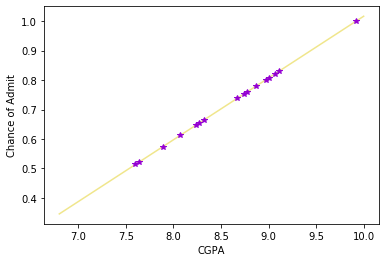

In [36]:
plt.plot(X, y, linestyle='-', color='khaki')

plt.plot(target['CGPA'], target['Chance of Admit'], '*', color='darkviolet')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')